# Test file 1

This ipynb file has been created for testing that
- importing the eis_toolkit package works
- executing functions in eis_toolkit works
- dependencies work

It also acts as a simple introduction to how you could use notebooks when developing eis_toolkit.

*DISCLAIMER*. Any of the functionalities utilizing GDAL functions will not work when testing eis_toolkit **outside of QGIS's Python console** unless you have separately taken care of installing GDAL library.

## General instructions

### Packages

Do not install any packages by yourself! We want to keep all packages excplicitly tracked so that the end-user only needs to run `pip install eis_toolkit` once and everything should work!

### Where's GDAL?

The GDAL installation is very platform specific, and would be a pain for testers at this point. We currently circumvent this by using the GDAL that comes with QGIS. This means GDAL-related issues will be resolved automatically when we call eis_toolkit functions from QGIS's python. 

This limits eis_toolkit as a standalone python library at this point, as we depend on QGIS for interacting with raster datasets.

### Where can I find data for testing?

An `example_data` folder is found in the notebooks directory. Some data can be found there, but we do not want to include any large files (50+ mb) as this would unecessarily slow down git.  

## Dummy tests
Here are some simple tests for importing simple placeholder functions from eis_toolkit and using them.

### Arithmetic dummy functions

In [1]:
from eis_toolkit.dependency_test.dummy import test_function
from eis_toolkit.dependency_test.dummy import test_function2

In [2]:
test_function(2, 4)

6

In [3]:
test_function2(19)

14

These worked fine!

Note that above we created own import command for both functions. The other option would have been to
```
from eis_toolkit.dependency_test import dummy

dummy.test_function(1,2)
dummy.test_function2(25)
```

### Dependency tests

In [4]:
from eis_toolkit.dependency_test import dummy_sklearn

In [5]:
import numpy as np

x = np.array(
    [
        [1.0, 2.0, 3.0],
        [2.0, 2.0, 6.0]
    ]
)

In [6]:
dummy_sklearn.sk_mean(x)

array([1.5, 2. , 4.5])

This worked fine!

In [7]:
from eis_toolkit.dependency_test import dummy_gdal

ModuleNotFoundError: No module named 'osgeo'

This did not work!

## Test and experiment with dependent libraries in general

In addition to using and testing the functionality of eis_toolkit, you can also use the notebooks to experiment with all the libraries that eis_toolkit depends on. This could come in handy for exploring new functionalities.

For example, these imports work:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

But of course, we cannot import anything that is not a dependency of eis_toolkit:

In [9]:
# This fails
import pygame

ModuleNotFoundError: No module named 'pygame'

Notebooks could be helpful for plotting, for example. Let's plot something:

In [10]:
def plot_random():
    """generate a plot of randomness"""
    
    fig, ax = plt.subplots()
    ax.plot(np.random.rand(15, 2))

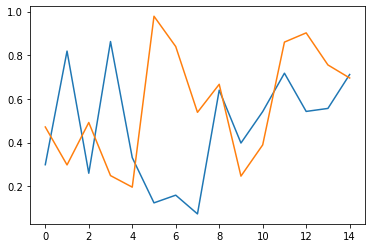

In [11]:
plot_random()

You can use external data as well:

In [12]:
import geopandas as gpd

world = gpd.read_file("./example_data/shp/naturalearth/")

Let's do something simple with geopandas, for example reproject a geodataframe:

In [13]:
world_3035 = world.to_crs(epsg=3035)

And see if it worked:

In [14]:
def plot_side_by_side(df1, df2):
    """plot two (geo)dataframes side by side"""
    
    fig, axs = plt.subplots(figsize=(15, 10), ncols=2)
    df1.plot(ax=axs[0])
    df2.plot(ax=axs[1])

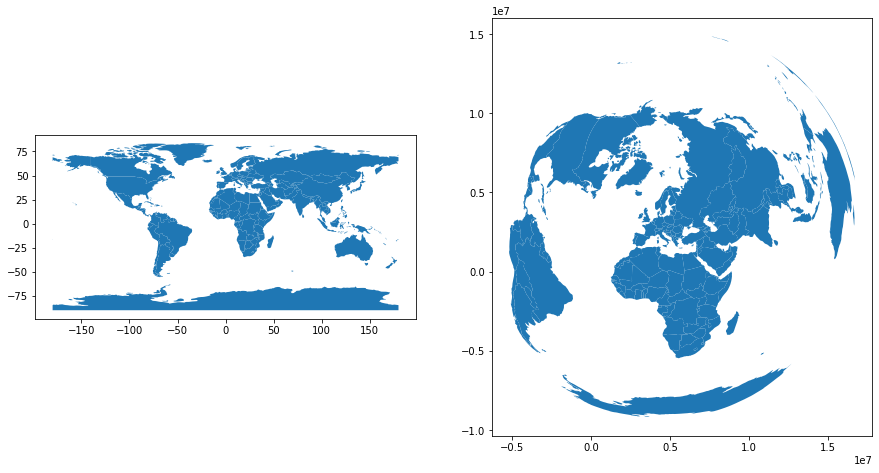

In [15]:
plot_side_by_side(
    world,
    world_3035,
)